In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def display(img, cmap='gray'):
    fig= plt.figure(figsize=(12,10))
    ax= fig.add_subplot(111)
    ax.imshow(img, cmap)

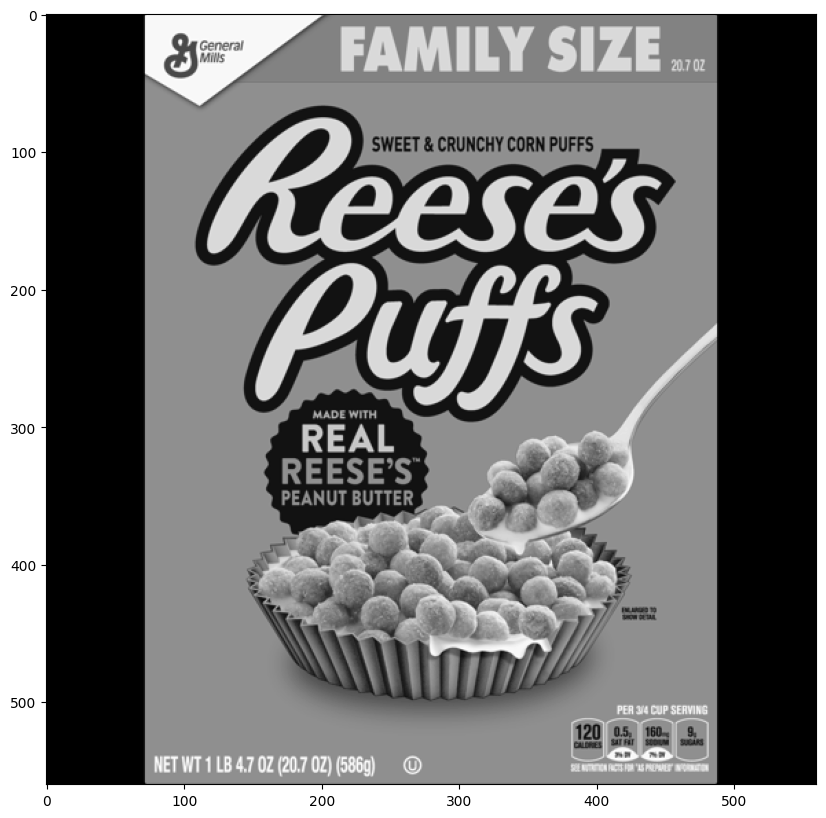

In [48]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)
display(reeses)

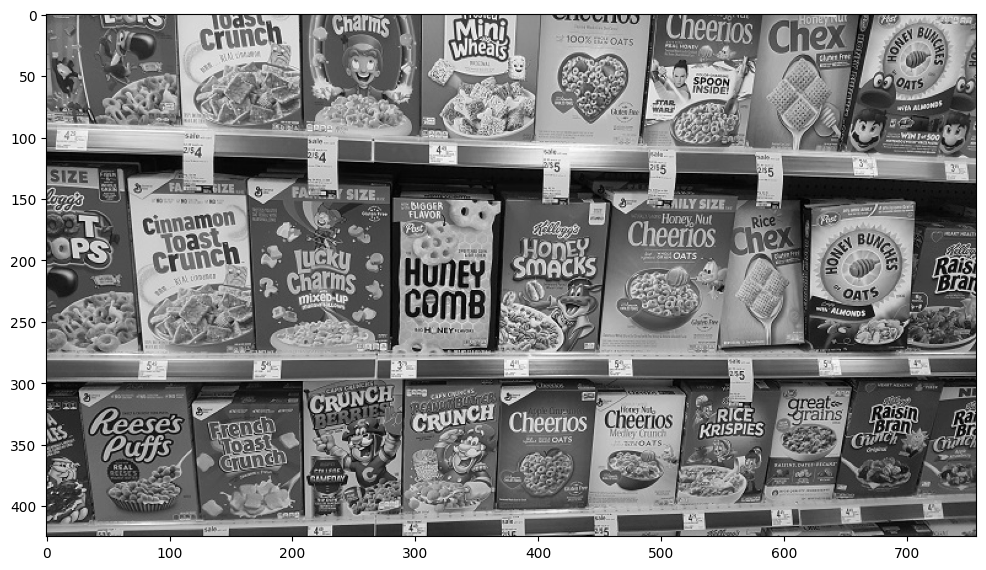

In [49]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)
display(cereals)

In [50]:
sift= cv2.SIFT.create()

In [51]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [52]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm= FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks= 50)

In [53]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [54]:
matches = flann.knnMatch(des1, des2, 2)

In [55]:
len(matches)

1501

In [56]:
matchesMask = [[0,0] for i in range(len(matches))]

In [57]:
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]

In [58]:
# len(good)
draw_params = dict(matchColor =(0, 255, 0), singlePointColor = (255, 0, 0), matchesMask= matchesMask, flags = 0)

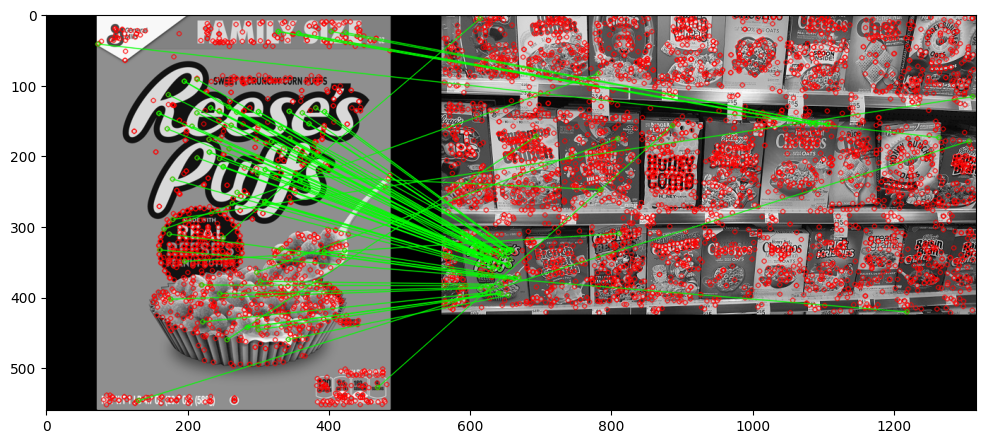

In [60]:
# flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags= 0)
# display(flann_matches)
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)